In [1]:
import networkx as nx
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from scipy.stats import norm
import pickle

### **Request 1**


Draw the requested graph for each one them 

In [2]:
def draw_graph(G):
  pos = nx.spring_layout(G)
  nx.draw(G, pos=pos, with_labels=True)
  plt.savefig('fig.png',bbox_inches='tight')

In [3]:
def make_erdos_renyi_graph(node_num, prob):
  G = nx.erdos_renyi_graph(n=node_num, p=prob)
  draw_graph(G)

In [4]:
def make_barabasi_albert_graph(node_num, attach_num):
  G = nx.barabasi_albert_graph(n=node_num, m=attach_num)
  draw_graph(G)

In [5]:
def make_watts_strogatz_graph(node_num, prob, k_nearest):
  G = nx.watts_strogatz_graph(n=node_num,k=k_nearest, p=prob)
  print(G)
  draw_graph(G)

The ER graph for number of 10 nodes & probability of 0.4

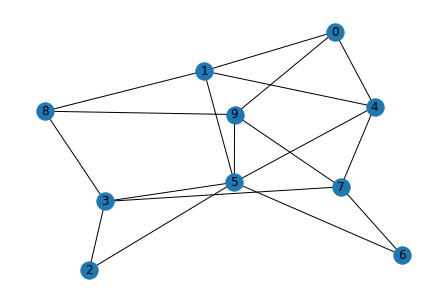

In [6]:
make_erdos_renyi_graph(10, 0.4)

The BA graph for number of 10 nodes & minimum neighbors of 3

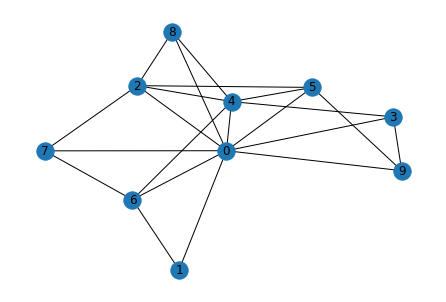

In [7]:
make_barabasi_albert_graph(10, 3)

The WS graph for number of 10 nodes & neighbors of 6 & probability of 6

Graph with 10 nodes and 30 edges


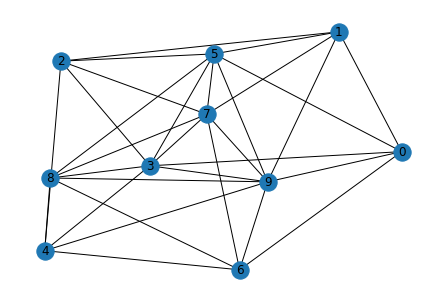

In [8]:
make_watts_strogatz_graph(10, 0.5, 6)

The ER Directed graph for number of 10 nodes & probability of 0.5 (for weakly and strongly connected)

DiGraph with 10 nodes and 42 edges


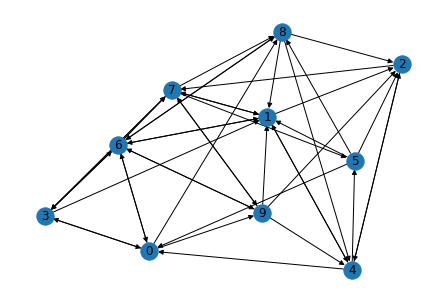

In [16]:
G = nx.erdos_renyi_graph(n=10, p=0.5, directed=True)
draw_graph(G)
print(G)

### **Request 2 & 3**


In [24]:
import networkx as nx
import numpy as np
import random
import time
import matplotlib.pyplot as plt
def magic (number_nodes, mode, sub_mode, eliminated_number, probability=0, new_node_edges=0, neighbors=0):
  
  if mode == 1: 
    G = nx.erdos_renyi_graph(n=number_nodes, p=probability)
  elif mode == 2: 
    G = nx.barabasi_albert_graph(n= number_nodes, m= new_node_edges)
  elif mode == 3:
    G = nx.watts_strogatz_graph(n=number_nodes,k=neighbors, p=probability)
  elif mode == 4: 
    G = nx.erdos_renyi_graph(n=number_nodes, p=probability, directed=True)
    # print(G)

    

  if sub_mode == 0:
  
    edges = list(G.edges())
    # print (edges)
    indices_edges = [i for i in range(len(edges))]
    if len(edges) < eliminated_number:
        eliminated_number = len(edges)
    selected_edges = list(np.random.choice(indices_edges, eliminated_number, replace = False))


    # print (selected_edges)
    for i in selected_edges:
      # print("Log Edges:", edges[i][0], edges[i][1])
      G.remove_edge(edges[i][0], edges[i][1])
  elif sub_mode == 1:
    nodes = list(G.nodes())
    indices_nodes = [i for i in range(len(nodes))]
    temp_eliminated_number = eliminated_number
    if len(nodes) - 1 < eliminated_number:
      eliminated_number = len(nodes) - 1
    if number_nodes - 1 <= temp_eliminated_number:
      return 0, number_nodes, 0, 0
    selected_nodes = list(np.random.choice(indices_nodes, eliminated_number, replace = False))
    for i in selected_nodes:
      G.remove_node(nodes[i])
      # print("Log Nodes:", nodes[i])
  # print("The graph:", G)

  # print("Edges: ", edges)
  # print("Selected edges:", selected_edges)

  # print("Nodes: ", nodes)
  # print("Selected nodes:", selected_nodes)


  connectivity = 0
  weak_connectivity = 0
  strong_connectivity = 0

  if mode != 4: 
    connectivity = nx.is_connected(G)
  else :
    weak_connectivity = nx.is_weakly_connected(G)
    strong_connectivity = nx.is_strongly_connected(G)
    # print(weak_connectivity, strong_connectivity)

  
  # number_of_connected_comps = nx.number_connected_components(G)
  num_isolated_nodes = len(list(nx.isolates(G)))

  # print(G)

  return int(connectivity), num_isolated_nodes, int(weak_connectivity), int(strong_connectivity)
  

  # pos = nx.spring_layout(G)
  # nx.draw(G, pos=pos, with_labels=True)
  # plt.savefig('fig.png',bbox_inches='tight')




# if __name__ == "__main__":
#     while True:
#         graph_mode = int(input("####### Graph Mode #######\n1.ER Graph\n2.BA Graph\n3.WS Graph\nEnter Mode: "))


In [11]:
def draw(n, num_of_elimination, connectivity, isolation, sub_mode, mode, is_draw=True, connectivity_strong=[]):


  x_value_0 = np.arange(0,num_of_elimination) / num_of_elimination * 100
  y_value_0 = 1-np.array(connectivity)

  x_value_1 = np.arange(0,num_of_elimination) / num_of_elimination * 100
  y_value_1 = np.array(isolation) / n

  x_value_2 = 0
  y_value_2 = 0

  if mode == 4:
    x_value_2 = np.arange(0,num_of_elimination) / num_of_elimination * 100
    y_value_2 = 1-np.array(connectivity_strong)


  if is_draw:
    if mode != 4:
      fig, axs = plt.subplots(1, 2, figsize=(14,7))
      text = "edges" if sub_mode == 0 else "nodes"

      axs[0].plot (x_value_0 , y_value_0)
      axs[0].set_xlabel('percentage of corrupted '+ text)
      axs[0].set_ylabel('probability of disconnection')

      axs[1].plot (x_value_1, y_value_1)
      axs[1].set_xlabel('percentage of corrupted '+ text)
      axs[1].set_ylabel('probability of isolation')

      plt.show()

    else:

      fig, axs = plt.subplots(1, 3, figsize=(21,7))
      text = "edges" if sub_mode == 0 else "nodes"

      axs[0].plot (x_value_0 , y_value_0)
      axs[0].set_xlabel('percentage of corrupted '+ text)
      axs[0].set_ylabel('probability of weakly disconnection')

      axs[1].plot (x_value_2 , y_value_2)
      axs[1].set_xlabel('percentage of corrupted '+ text)
      axs[1].set_ylabel('probability of strongly disconnection')

      axs[2].plot (x_value_1, y_value_1)
      axs[2].set_xlabel('percentage of corrupted '+ text)
      axs[2].set_ylabel('probability of isolation')

      plt.show()


    # file_name_0 = "dis_" + text + "_"
    # file_name_1 = "iso_" + text + "_" 
    # if (mode == 1):
    #     file_name_0 += "ER"
    #     file_name_1 += "ER"
    # elif (mode == 2):
    #     file_name_0 += "BA"
    #     file_name_1 += "BA"
    # elif (mode == 3):
    #     file_name_0 += "WS"
    #     file_name_1 += "WS"

    # file_name_0 += ".pickle"
    # file_name_1 += ".pickle"

    # with open(file_name_0, 'wb') as f: # should be 'wb' rather than 'w'
    #   pickle.dump(axs[0], f) 

    # with open(file_name_1, 'wb') as f: # should be 'wb' rather than 'w'
    #   pickle.dump(axs[1], f) 
    


    # pickle.dump(axs[0], file(file_name_0, 'w'))
    # pickle.dump(axs[1], file(file_name_1, 'w'))
  if mode != 4:
    return x_value_0, y_value_0, x_value_1, y_value_1
  else:
    return x_value_0, y_value_0, x_value_1, y_value_1, x_value_2, y_value_2

In [28]:
def run(num_of_elimination,exp_repetition, mode, sub_mode, n, p=0, k=0, m=0, is_draw=True):
  # n = 20
  # p = 0.3

  weak_connectivity = []
  strong_connectivity = []
  connectivity = []
  isolation = []

  # num_of_elimination = 220
  # exp_repetition = 100

  for j in range (num_of_elimination):
    sum_weak_connectivity=0
    sum_strong_connectivity=0
    sum_connectivity=0
    sum_isolated=0
    counter = 0
    for i in range (exp_repetition):
      if mode == 1:
        out = magic(number_nodes = n, probability = p, mode = mode, sub_mode = sub_mode, eliminated_number=j)
      elif mode == 2:
        out = magic(number_nodes = n, new_node_edges = m, mode = mode, sub_mode = sub_mode, eliminated_number=j)
      elif mode == 3:
        out = magic(number_nodes = n, probability = p, mode = mode, sub_mode = sub_mode, eliminated_number=j, neighbors=k)
      elif mode == 4:
        out = magic(number_nodes = n, probability = p, mode = mode, sub_mode = sub_mode, eliminated_number=j)
        
      sum_connectivity += out[0]
      sum_isolated += out[1] 
      sum_weak_connectivity += out[2]
      sum_strong_connectivity += out[3]

    connectivity.append(sum_connectivity/exp_repetition)
    isolation.append(sum_isolated/exp_repetition)
    weak_connectivity.append(sum_weak_connectivity/exp_repetition)
    strong_connectivity.append(sum_strong_connectivity/exp_repetition)

  # sd = np.std(np.array(connectivity))
  # mean = np.mean(np.array(connectivity))
  # error = 1.96 * sd / np.sqrt(num_of_elimination)
  # f1, f2 = mean-error, mean+error


  # sub_connectivity = np.array(connectivity)[(connectivity>f1)*(connectivity<f2)]
  # perc = len(sub_connectivity)/ len(connectivity) * 100

  # print(connectivity)
  # print(sub_connectivity)
  # print(f1, f2)
  # print(perc, "%")

  # connectivity_std = (np.array(connectivity) - mean) / sd


  # print(connectivity_std)

  # plt.plot (connectivity_std , norm.pdf(connectivity_std), 'ro')
  # plt.show()


  # print (connectivity, isolation,weak_connectivity,strong_connectivity ,sep= '\n')
  if mode != 4:
    return draw(n, num_of_elimination, connectivity, isolation, sub_mode=sub_mode, mode=mode, is_draw=is_draw)
  else:
    return draw(n, num_of_elimination, weak_connectivity, isolation, sub_mode=sub_mode, mode=mode, is_draw=is_draw, connectivity_strong=strong_connectivity)

### **ER**

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.98, 0.99, 1.0, 0.99, 0.99, 0.99, 0.97, 0.96, 0.97, 0.98, 0.94, 0.96, 0.96, 0.94, 0.96, 0.96, 0.97, 0.92, 0.91, 0.91, 0.94, 0.84, 0.85, 0.83, 0.83, 0.79, 0.72, 0.77, 0.71, 0.69, 0.61, 0.7, 0.52, 0.55, 0.53, 0.44, 0.49, 0.43, 0.26, 0.31, 0.35, 0.27, 0.24, 0.15, 0.13, 0.19, 0.11, 0.11, 0.06, 0.04, 0.06, 0.03, 0.01, 0.05, 0.02, 0.01, 0.0, 0.01, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.02, 0.01, 0.0, 0.01, 0.01, 0.01, 0.03, 0.04, 0.04, 0.02, 0.06, 0.04, 0.04, 0.06, 0.04, 0.04, 0.03, 0.09, 0.1, 0.08, 0.07, 0.2, 0.17, 0.19, 0.16, 0.28, 0.33, 0.25, 0.34, 0.42, 0.51, 0.37, 0.69, 0.66, 0.61, 0.99, 0.86, 1.01, 1.59, 1.47, 1.4, 1.61, 1.83, 2.29, 2.54, 2.13, 3.12, 3.27, 3.76, 4.01, 5.04, 5.19, 6.04, 5.77, 7.24, 7.51, 9.

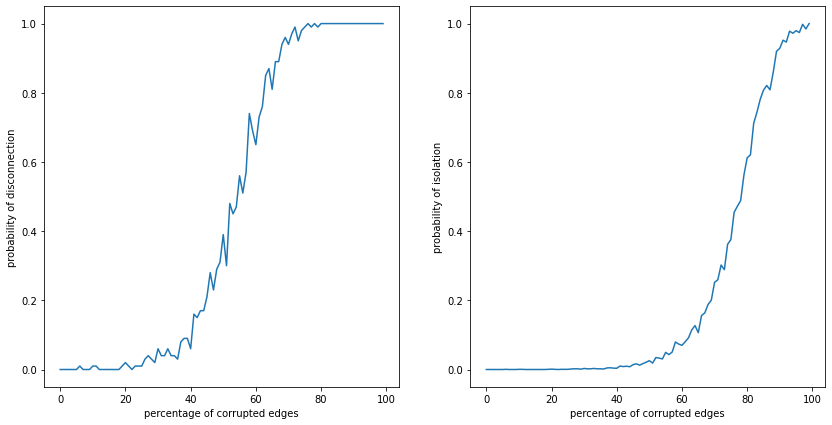

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 0.96, 0.99, 0.92, 0.83, 0.85, 0.71, 0.58, 0.5, 0.39, 0.38, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.04, 0.01, 0.08, 0.14, 0.13, 0.27, 0.53, 0.62, 0.91, 1.24, 20.0, 20.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


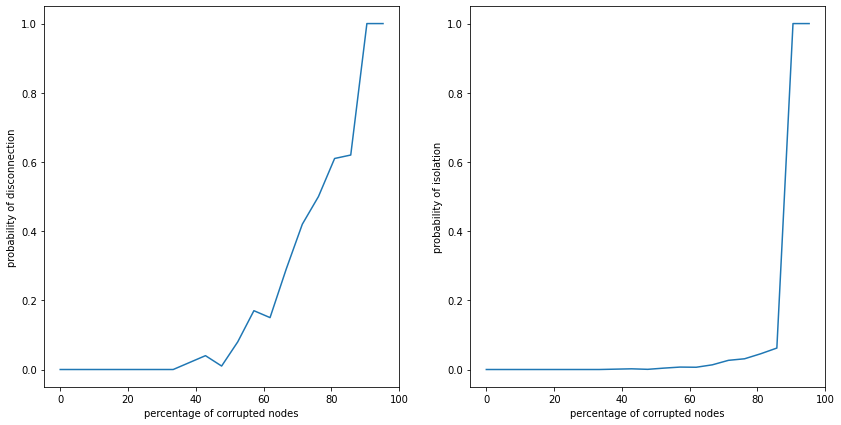

In [21]:
dis_edges_x_ER, dis_edges_y_ER, iso_edges_x_ER, iso_edges_y_ER = run(num_of_elimination=100,exp_repetition=100, mode=1, sub_mode=0, n=20, p=0.45)
dis_nodes_x_ER, dis_nodes_y_ER, iso_nodes_x_ER, iso_nodes_y_ER = run(num_of_elimination=21,exp_repetition=100, mode=1, sub_mode=1, n=20, p=0.45)

### **ER Directed**

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.001, 0.0, 0.001, 0.001, 0.001, 0.002, 0.0, 0.002, 0.003, 0.003, 0.001, 0.003, 0.002, 0.004, 0.002, 0

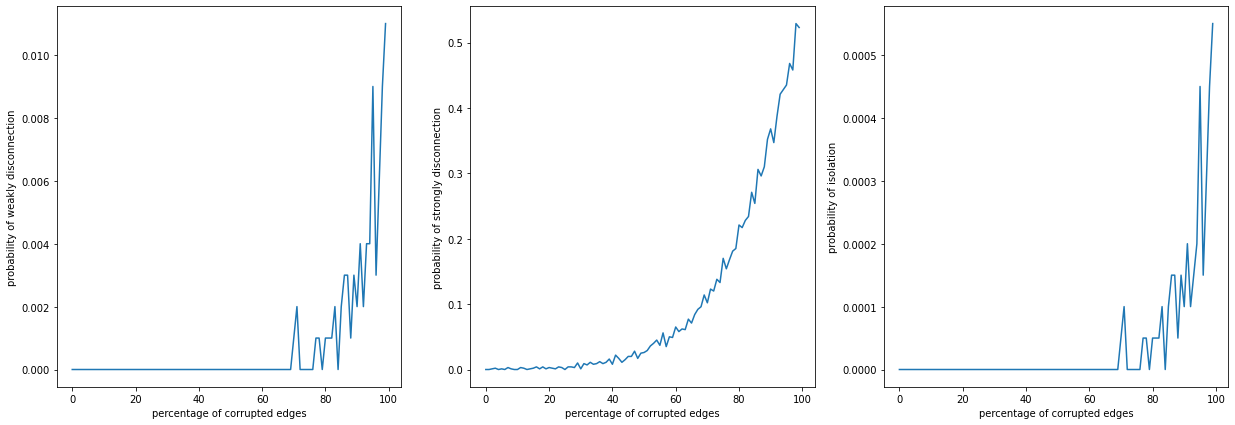

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.003, 0.004, 0.019, 0.036, 0.103, 0.291, 0.602, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.

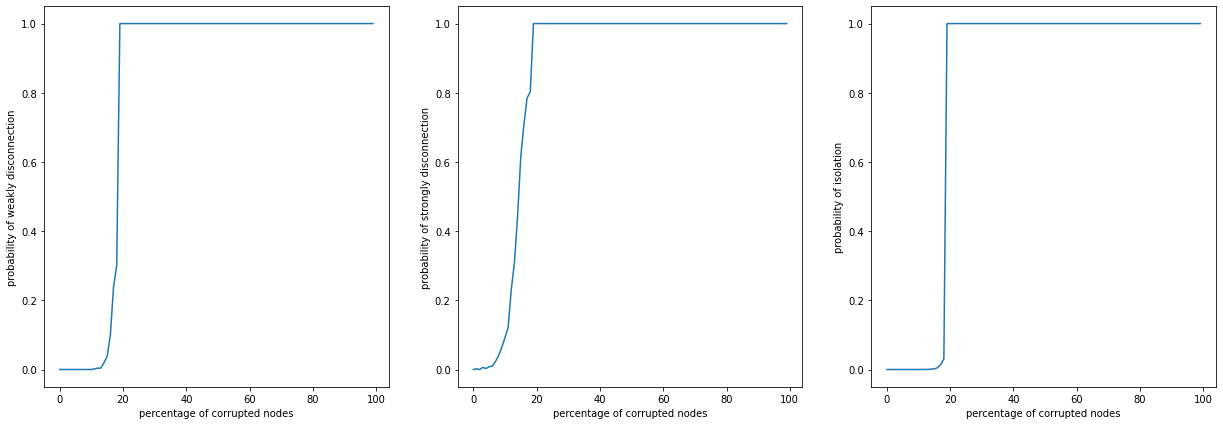

In [26]:
dis_w_edges_x_ERD, dis_w_edges_y_ERD, iso_edges_x_ERD, iso_edges_y_ERD, dis_s_edges_x_ERD, dis_s_edges_y_ERD = run(num_of_elimination=100,exp_repetition=1000, mode=4, sub_mode=0, n=20, p=0.45)
dis_w_nodes_x_ERD, dis_w_nodes_y_ERD, iso_nodes_x_ERD, iso_nodes_y_ERD, dis_s_nodes_x_ERD, dis_s_nodes_y_RED = run(num_of_elimination=100,exp_repetition=1000, mode=4, sub_mode=1, n=20, p=0.45)

### **BA**

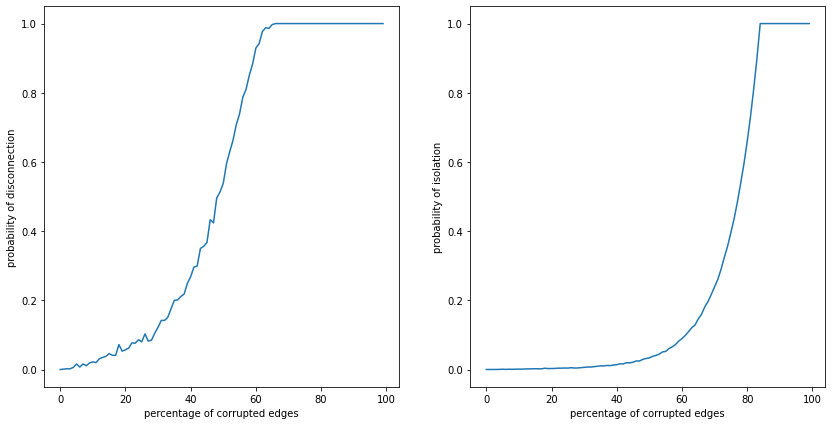

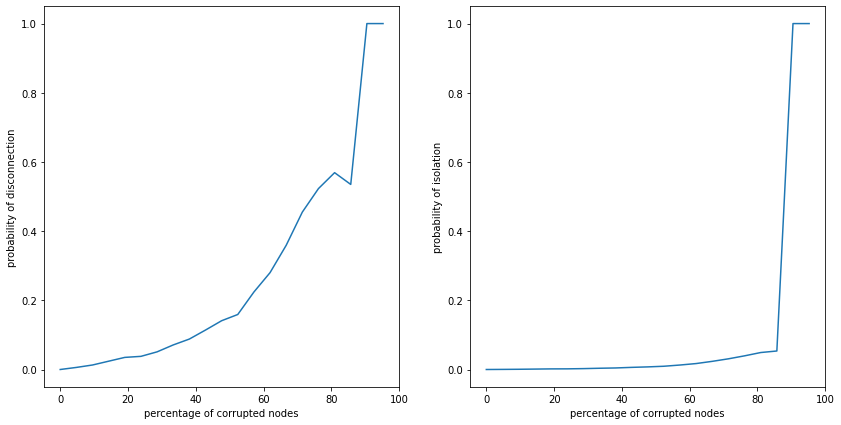

In [25]:
dis_edges_x_BA, dis_edges_y_BA, iso_edges_x_BA, iso_edges_y_BA = run(num_of_elimination=100,exp_repetition=1000, mode=2, sub_mode=0, n=20, m=6)
dis_nodes_x_BA, dis_nodes_y_BA, iso_nodes_x_BA, iso_nodes_y_BA = run(num_of_elimination=21,exp_repetition=1000, mode=2, sub_mode=1, n=20, m=6)


### **WS**

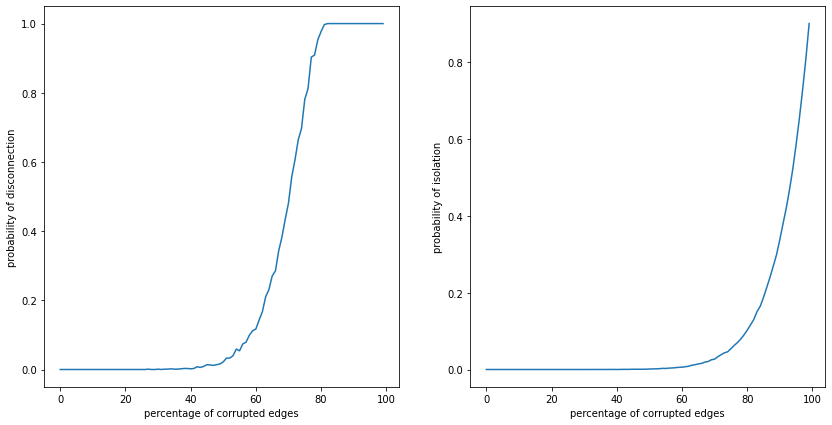

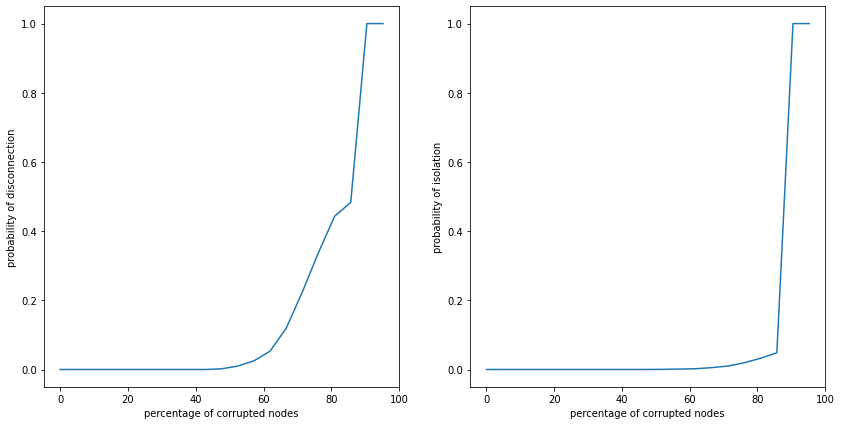

In [26]:
dis_edges_x_WS, dis_edges_y_WS, iso_edges_x_WS, iso_edges_y_WS = run(num_of_elimination=100,exp_repetition=1000, mode=3, sub_mode=0, n=20, p=0.45, k=10)
dis_nodes_x_WS, dis_nodes_y_WS, iso_nodes_x_WS, iso_nodes_y_WS = run(num_of_elimination=21,exp_repetition=1000, mode=3, sub_mode=1, n=20, p=0.45, k=10)

### **Comaparison**

**Edges - Disconnection**

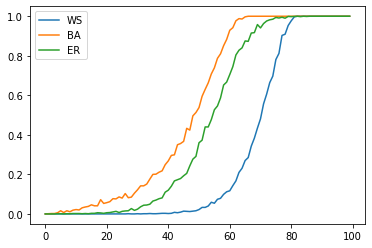

In [27]:
plt.plot(dis_edges_x_WS, dis_edges_y_WS, label='WS')
plt.plot(dis_edges_x_BA, dis_edges_y_BA, label='BA')
plt.plot(dis_edges_x_ER, dis_edges_y_ER, label='ER')
plt.legend(loc="upper left")
plt.show()

**Edges - Isolation**

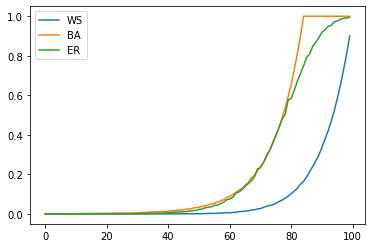

In [28]:
plt.plot(iso_edges_x_WS, iso_edges_y_WS, label="WS")
plt.plot(iso_edges_x_BA, iso_edges_y_BA, label="BA")
plt.plot(iso_edges_x_ER, iso_edges_y_ER, label="ER")
plt.legend(loc="upper left")
plt.show()

**Nodes - Disconnection**

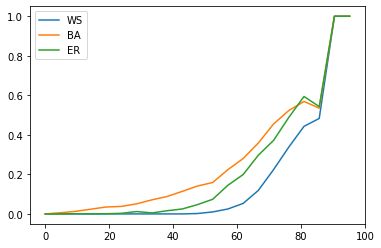

In [29]:
plt.plot(dis_nodes_x_WS, dis_nodes_y_WS, label="WS")
plt.plot(dis_nodes_x_BA, dis_nodes_y_BA, label="BA")
plt.plot(dis_nodes_x_ER, dis_nodes_y_ER, label="ER")
plt.legend(loc="upper left")
plt.show()

**Nodes - Isolation**

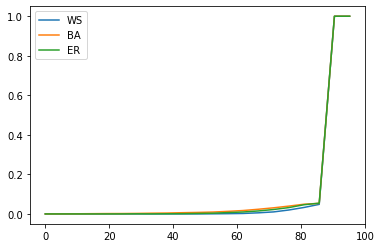

In [30]:
plt.plot(iso_nodes_x_WS, iso_nodes_y_WS, label="WS")
plt.plot(iso_nodes_x_BA, iso_nodes_y_BA, label="BA")
plt.plot(iso_nodes_x_ER, iso_nodes_y_ER, label="ER")
plt.legend(loc="upper left")
plt.show()

### ***Request4 & Test***

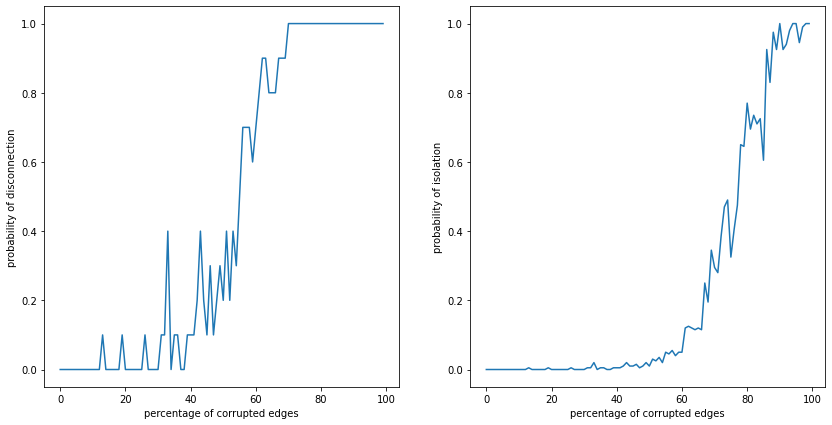

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.
 0.  0.1 0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.1 0.1 0.4 0.  0.1
 0.1 0.  0.  0.1 0.1 0.1 0.2 0.4 0.2 0.1 0.3 0.1 0.2 0.3 0.2 0.4 0.2 0.4
 0.3 0.5 0.7 0.7 0.7 0.6 0.7 0.8 0.9 0.9 0.8 0.8 0.8 0.9 0.9 0.9 1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]


In [31]:
dis_edges_x_ER, dis_edges_y_ER, iso_edges_x_ER, iso_edges_y_ER = run(num_of_elimination=100,exp_repetition=10, mode=1, sub_mode=0, n=20, p=0.45)
print(dis_edges_y_ER)

Sampling for 60th edge and the disconnectivity for ER indirected 

In [59]:
dis_edges_y_ER_mean = np.zeros(len(dis_edges_y_ER))
iso_edges_y_ER_mean = np.zeros(len(iso_edges_y_ER))

sample = []
sample = np.array(sample)

for i in range(100):
  dis_edges_x_ER, dis_edges_y_ER, iso_edges_x_ER, iso_edges_y_ER = run(num_of_elimination=100,exp_repetition=100, mode=1, sub_mode=0, n=20, p=0.45, is_draw=False)

  # print(dis_edges_y_ER[60])
  sample = np.append(sample, [dis_edges_y_ER[60]])

  dis_edges_y_ER_mean += dis_edges_y_ER
  iso_edges_y_ER_mean += iso_edges_y_ER

In [60]:
dis_edges_y_ER_mean

array([2.000e-02, 4.000e-02, 6.000e-02, 6.000e-02, 4.000e-02, 5.000e-02,
       7.000e-02, 6.000e-02, 9.000e-02, 1.200e-01, 1.000e-01, 1.000e-01,
       1.100e-01, 1.800e-01, 3.500e-01, 2.500e-01, 4.100e-01, 4.200e-01,
       5.200e-01, 8.000e-01, 8.000e-01, 6.700e-01, 9.800e-01, 1.070e+00,
       1.270e+00, 1.290e+00, 1.790e+00, 1.870e+00, 2.440e+00, 2.600e+00,
       3.160e+00, 3.530e+00, 4.050e+00, 4.670e+00, 4.530e+00, 5.900e+00,
       7.270e+00, 7.630e+00, 8.850e+00, 9.810e+00, 1.114e+01, 1.332e+01,
       1.510e+01, 1.655e+01, 1.881e+01, 2.167e+01, 2.324e+01, 2.528e+01,
       2.781e+01, 3.119e+01, 3.376e+01, 3.790e+01, 4.138e+01, 4.584e+01,
       4.910e+01, 5.237e+01, 5.608e+01, 6.135e+01, 6.365e+01, 6.863e+01,
       7.187e+01, 7.563e+01, 7.799e+01, 8.147e+01, 8.385e+01, 8.625e+01,
       8.908e+01, 9.174e+01, 9.280e+01, 9.428e+01, 9.565e+01, 9.664e+01,
       9.722e+01, 9.795e+01, 9.849e+01, 9.875e+01, 9.933e+01, 9.940e+01,
       9.970e+01, 9.976e+01, 9.982e+01, 9.986e+01, 

In [61]:
dis_edges_y_ER_mean_rolled = np.roll(dis_edges_y_ER_mean, 1)
dis_edges_y_ER_mean_rolled[0] = 0

In [62]:
dis_edges_y_ER_mean_rolled

array([0.000e+00, 2.000e-02, 4.000e-02, 6.000e-02, 6.000e-02, 4.000e-02,
       5.000e-02, 7.000e-02, 6.000e-02, 9.000e-02, 1.200e-01, 1.000e-01,
       1.000e-01, 1.100e-01, 1.800e-01, 3.500e-01, 2.500e-01, 4.100e-01,
       4.200e-01, 5.200e-01, 8.000e-01, 8.000e-01, 6.700e-01, 9.800e-01,
       1.070e+00, 1.270e+00, 1.290e+00, 1.790e+00, 1.870e+00, 2.440e+00,
       2.600e+00, 3.160e+00, 3.530e+00, 4.050e+00, 4.670e+00, 4.530e+00,
       5.900e+00, 7.270e+00, 7.630e+00, 8.850e+00, 9.810e+00, 1.114e+01,
       1.332e+01, 1.510e+01, 1.655e+01, 1.881e+01, 2.167e+01, 2.324e+01,
       2.528e+01, 2.781e+01, 3.119e+01, 3.376e+01, 3.790e+01, 4.138e+01,
       4.584e+01, 4.910e+01, 5.237e+01, 5.608e+01, 6.135e+01, 6.365e+01,
       6.863e+01, 7.187e+01, 7.563e+01, 7.799e+01, 8.147e+01, 8.385e+01,
       8.625e+01, 8.908e+01, 9.174e+01, 9.280e+01, 9.428e+01, 9.565e+01,
       9.664e+01, 9.722e+01, 9.795e+01, 9.849e+01, 9.875e+01, 9.933e+01,
       9.940e+01, 9.970e+01, 9.976e+01, 9.982e+01, 

In [63]:
dis_edges_y_ER_mean_rolled = dis_edges_y_ER_mean - dis_edges_y_ER_mean_rolled

Comulative Normal Distribution

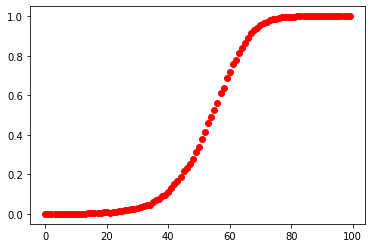

In [66]:
plt.plot(dis_edges_x_ER,dis_edges_y_ER_mean/100,'ro')

Normal Distribution

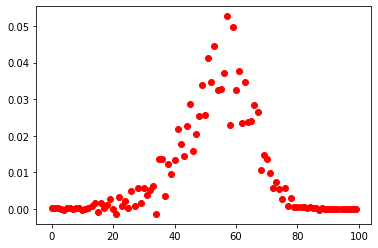

In [70]:
plt.plot(dis_edges_x_ER,dis_edges_y_ER_mean_rolled/100,'ro')

In [31]:
print(sample)
sample_mean = np.mean(np.array(sample))
# sample_SE = np.sqrt(sample_mean * (1-sample_mean) / 100)
sample_SD = np.std(np.array(sample))
sample_SE = sample_SD / np.sqrt(len(sample))
# print(sample_mean)
# print(sample_sd)
err1, err2 = sample_mean - 2 * sample_SE, sample_mean + 2 * sample_SE
print("This", err1, err2)


# z = (sample - sample_mean) / sample_sd
# print(z)

[0.74 0.61 0.73 0.72 0.71 0.74 0.61 0.79 0.7  0.75 0.83 0.73 0.7  0.73
 0.74 0.7  0.67 0.72 0.77 0.71 0.76 0.69 0.71 0.68 0.76 0.75 0.62 0.71
 0.74 0.78 0.7  0.66 0.68 0.78 0.66 0.73 0.64 0.72 0.74 0.71 0.67 0.83
 0.73 0.68 0.7  0.71 0.71 0.75 0.74 0.72]
This 0.7040298519370511 0.7303701480629492


In [71]:
unique, counts = np.unique(sample, return_counts=True)
plot_sample = np.asarray((unique, counts)).T

Frequency Repetition Graph

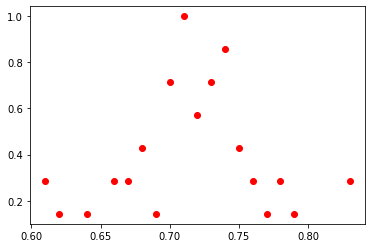

In [33]:
plt.plot(plot_sample[:,0],plot_sample[:,1]/np.max(plot_sample[:,1]),'ro' ,label='WS')

Num of exp_repetition check

In [ ]:
final_test_array = []
final_test_array = np.empty(final_test_array);
for i in range(1, 100):
  dis_edges_x_ER, dis_edges_y_ER, iso_edges_x_ER, iso_edges_y_ER = run(num_of_elimination=100,exp_repetition=i, mode=1, sub_mode=0, n=20, p=0.45, is_draw=False)
  final_test_array = np.append(final_test_array, [iso_edges_y_ER[60]])
  #print(final_test_array)



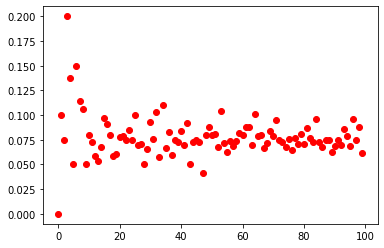

In [101]:
#final_test
plt.plot(np.arange(100), final_test_array,'ro')